# Feature Engineering

importing stuff

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [35]:
df = pd.read_csv('cleaned_combined_airbnb.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [36]:
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,total_reviews,days_since_review,comment_length
0,50904.0,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,...,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1358.500000,255.500000
1,891884.0,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,...,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,619.000000,127.000000
2,891907.0,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,...,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0,1694.500000,300.166667
3,2543695.0,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,...,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0,1603.866667,362.866667
4,116134.0,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,...,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0,1540.908333,265.266667


In [37]:
df.columns

Index(['listing_id', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights', 'listing_url', 'name', 'latitude', 'longitude',
       'property_type', 'room_type', 'accomodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'host_id', 'host_name', 'host_since',
       'host_location', 'total_reviews', 'days_since_review',
       'comment_length'],
      dtype='object')

#### We can create a feature called 'host_since' as we know when the host joined the platform, we can use that information and represent the same as a number.

In [38]:
df['host_since']

0       2010-09-14
1       2010-09-14
2       2010-09-14
3       2010-09-14
4       2011-05-14
           ...    
1694    2021-11-23
1695    2017-12-29
1696    2015-10-11
1697    2020-11-30
1698    2021-12-24
Name: host_since, Length: 1699, dtype: object

In [39]:
df['host_since']= pd.to_datetime(df['host_since'])

In [40]:
df['host_since']

0      2010-09-14
1      2010-09-14
2      2010-09-14
3      2010-09-14
4      2011-05-14
          ...    
1694   2021-11-23
1695   2017-12-29
1696   2015-10-11
1697   2020-11-30
1698   2021-12-24
Name: host_since, Length: 1699, dtype: datetime64[ns]

In [41]:
basedate = pd.Timestamp('2022-04-18')
days_since_joined = abs(df['host_since'] - basedate).dt.days
days_since_joined

0       4234
1       4234
2       4234
3       4234
4       3992
        ... 
1694     146
1695    1571
1696    2381
1697     504
1698     115
Name: host_since, Length: 1699, dtype: int64

In [42]:
df['days_since_joined'] = days_since_joined

<AxesSubplot:xlabel='days_since_joined', ylabel='Density'>

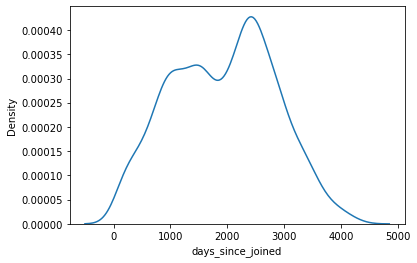

In [43]:
sns.kdeplot(df['days_since_joined'])

#### Let's also see, if we can make something of the host location column, the least we can do is to extract the country from that column

In [44]:
for i in df['host_location'].unique():
    print(i)

Antwerp, Flanders, Belgium
Kapellen, Flanders, Belgium
Antwerp, Vlaams Gewest, Belgium
Lier, Vlaanderen, Belgium
Antwerpen, Vlaams Gewest, Belgium
Antwerpen, Flemish Region, Belgium
Edegem, Flanders, Belgium
Herentals, Flanders, Belgium
Aartselaar, Flanders, Belgium
Ghent, Flanders, Belgium
Antwerpen, Flanders, Belgium
Zoersel, Flanders, Belgium
Hove, Flanders, Belgium
Middelburg, Zeeland, Netherlands
BE
Belgium
Wommelgem, Flanders, Belgium
Brasschaat, Flanders, Belgium
Antwerpen, Vlaanderen, Belgium
Netherlands
Deurne, Vlaams Gewest, Belgium
Arendonk, Flanders, Belgium
Greater London, England, United Kingdom
's-Hertogenbosch, North Brabant, Netherlands
Stekene, Flanders, Belgium
Amsterdam, North Holland, The Netherlands
Bergen, Noord-Holland, Netherlands
 Zeeland, Netherlands
Wuustwezel, Flanders, Belgium
Wijnegem, Flanders, Belgium
Nazareth, Flanders, Belgium
Tessenderlo, Flanders, Belgium
New York, New York, United States
Vorselaar, Flanders, Belgium
Kruibeke, Flanders, Belgium
Heve

In [45]:
def return_country(x):
    try:
        text_list = x.split(',')
        if len(text_list) == 3:
            return text_list[2]
        else:
            return text_list[0]
    except:
        return None
        
def return_state(x):
    try:        
        text_list = x.split(',')
        if len(text_list) == 3:
            return text_list[1]
        else:
            return None
    except:
        return None
    
def return_city(x):
    try:        
        text_list = x.split(',')
        if len(text_list) == 3:
            return text_list[0]
        else:
            return None
    except:
        return None

In [46]:
df['host_location_country'] = df['host_location'].apply(return_country)
df['host_location_state'] = df['host_location'].apply(return_state)
df['host_location_city'] = df['host_location'].apply(return_city)

In [47]:
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,host_name,host_since,host_location,total_reviews,days_since_review,comment_length,days_since_joined,host_location_country,host_location_state,host_location_city
0,50904.0,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,...,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1358.500000,255.500000,4234,Belgium,Flanders,Antwerp
1,891884.0,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,...,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,619.000000,127.000000,4234,Belgium,Flanders,Antwerp
2,891907.0,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,...,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0,1694.500000,300.166667,4234,Belgium,Flanders,Antwerp
3,2543695.0,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,...,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0,1603.866667,362.866667,4234,Belgium,Flanders,Antwerp
4,116134.0,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,...,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0,1540.908333,265.266667,3992,Belgium,Flanders,Kapellen


<AxesSubplot:>

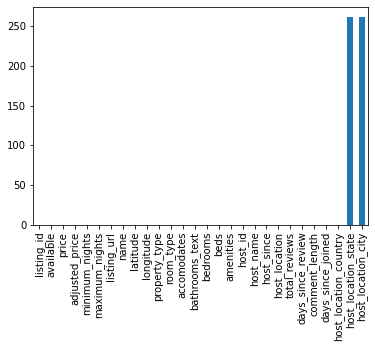

In [48]:
df.isna().sum().plot(kind='bar')

Okay, so the host state and city have a lot of null values.
- This again gives us a dilema
- Do we remove those rows
- Or do we just drop the column

If i remove the rows, that will be 250 rows removed out of 1700, that is about 14% of the data.
- If you wish to, you can do this. (perfectly valid approach)
- But here, i am not going to do that, i am going to drop the column.

In [49]:
df.columns

Index(['listing_id', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights', 'listing_url', 'name', 'latitude', 'longitude',
       'property_type', 'room_type', 'accomodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'host_id', 'host_name', 'host_since',
       'host_location', 'total_reviews', 'days_since_review', 'comment_length',
       'days_since_joined', 'host_location_country', 'host_location_state',
       'host_location_city'],
      dtype='object')

In [50]:
df.drop(['host_location_state','host_location_city'], axis=1, inplace=True)

So, i have dropped those 2 columns, let's see how the new feature host_location_country is distributed

In [51]:
df.groupby('host_location_country').count()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,beds,amenities,host_id,host_name,host_since,host_location,total_reviews,days_since_review,comment_length,days_since_joined
host_location_country,,,,,,,,,,,,,,,,,,,,,
Belgium,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,...,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364
Estonia,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
France,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Germany,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
India,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Italy,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Netherlands,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
North Macedonia,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Norway,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


I see a lot of countries being repeated, i should clean this out.

In [52]:
df['host_location_country'].nunique()

40

In [53]:
df['host_location_country'].unique()

array([' Belgium', ' Netherlands', 'BE', 'Belgium', 'Netherlands',
       ' United Kingdom', ' The Netherlands', ' Zeeland',
       ' United States', ' Norway', ' Switzerland', ' Spain', ' Portugal',
       'Antwerpen Belgium  / Chiavenna Italy', ' France', 'NL', 'Skopje',
       'Styria', ' Italy', 'GB', ' India', 'TR', 'DK', 'Greece', 'Moscow',
       'Airbnb Studio Minerva', 'Flanders', ' North Macedonia', 'US',
       'France', ' Germany', 'IT', ' Estonia', 'EE', 'Kyiv', 'Floriana',
       'ES', 'FR', 'België', 'Germany'], dtype=object)

In [54]:
country_dic = {
    ' The Netherlands': 'Netherlands',
    'Zeeland': 'New Zealand',
    ' Zeeland': 'New Zealand',
    ' Netherlands':'Netherlands',
    ' The Netherlands': 'Netherlands',
    'BE': 'Belgium',
    ' Belgium': 'Belgium',
    'Belgium': 'Belgium',
    'België': 'Belgium',
    'DK': 'Denmark',
    'EE': 'Estonia',
    ' Estonia':'Estonia',
    'ES': 'Spain',
    'FR' : 'France',
    ' France': 'France',
    ' Italy': 'Italy',
    'GB': 'United Kingdom',
    ' Germany': 'Germany',
    ' United Kingdom': 'United Kingdom',
    ' United States': 'United States',
    'IT': 'Italy',
    'Antwerpen Belgium  / Chiavenna Italy': 'Italy', 
    ' Spain': 'Spain',
    'NL': 'Netherlands',
    'TR': 'Turkey',
    'US': 'United States',
    ' Norway': 'Norway'
    }

In [55]:
df['host_location_country'] = df['host_location_country'].map(country_dic).fillna(df['host_location_country'])

In [56]:
df['host_location_country'].unique()

array(['Belgium', 'Netherlands', 'United Kingdom', 'New Zealand',
       'United States', 'Norway', ' Switzerland', 'Spain', ' Portugal',
       'Italy', 'France', 'Skopje', 'Styria', ' India', 'Turkey',
       'Denmark', 'Greece', 'Moscow', 'Airbnb Studio Minerva', 'Flanders',
       ' North Macedonia', 'Germany', 'Estonia', 'Kyiv', 'Floriana'],
      dtype=object)

In [57]:
df.groupby('host_location_country').count()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,beds,amenities,host_id,host_name,host_since,host_location,total_reviews,days_since_review,comment_length,days_since_joined
host_location_country,,,,,,,,,,,,,,,,,,,,,
India,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
North Macedonia,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Portugal,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Switzerland,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Airbnb Studio Minerva,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Belgium,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,...,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573
Denmark,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Estonia,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
Flanders,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:xlabel='host_location_country'>

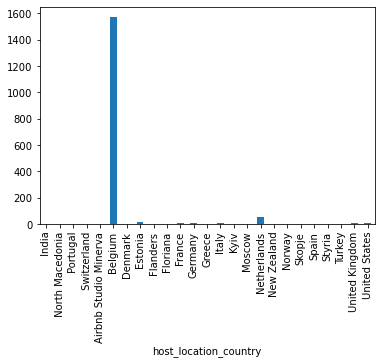

In [59]:
df.groupby('host_location_country').count()['listing_id'].plot(kind='bar')

#### That's not good
- Most of our listings 1573 (92.5%) are from belgium.
- This means this column might not prove to be that useful as we don't have much data for the other countries
- Maybe i should have not dropped the 'host_location_state', 'host_location_city' columns and should have just removed the rows instead. 
- Maybe, you should just try that out!!

----------

In [60]:
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,amenities,host_id,host_name,host_since,host_location,total_reviews,days_since_review,comment_length,days_since_joined,host_location_country
0,50904.0,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,...,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1358.500000,255.500000,4234,Belgium
1,891884.0,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,...,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,619.000000,127.000000,4234,Belgium
2,891907.0,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,...,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0,1694.500000,300.166667,4234,Belgium
3,2543695.0,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,...,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0,1603.866667,362.866667,4234,Belgium
4,116134.0,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,...,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0,1540.908333,265.266667,3992,Belgium


<AxesSubplot:xlabel='room_type'>

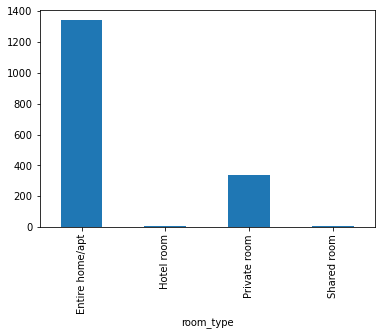

In [61]:
df.groupby('room_type').count()['listing_id'].plot(kind='bar')

The room type does not look to be too distributed, let's see

<AxesSubplot:xlabel='property_type'>

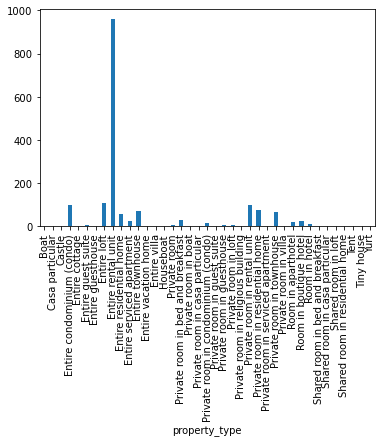

In [62]:
df.groupby('property_type').count()['latitude'].plot(kind='bar')

The property type has too many categorical types for my taste, i would like to reduce this somehow and see if it perfoms better in the model.

In [63]:
df['property_type'].unique()

array(['Room in boutique hotel', 'Entire rental unit',
       'Entire condominium (condo)', 'Private room in residential home',
       'Private room in rental unit', 'Private room in townhouse',
       'Entire residential home', 'Private room in bed and breakfast',
       'Entire loft', 'Entire townhouse', 'Private room in boat',
       'Private room in loft', 'Shared room in residential home',
       'Entire cottage', 'Private room', 'Yurt', 'Entire villa',
       'Houseboat', 'Private room in condominium (condo)', 'Tent',
       'Entire serviced apartment', 'Tiny house', 'Entire guest suite',
       'Private room in guest suite', 'Room in hotel',
       'Private room in villa', 'Private room in guesthouse',
       'Entire guesthouse', 'Room in aparthotel', 'Casa particular',
       'Private room in religious building',
       'Private room in serviced apartment', 'Shared room in loft',
       'Shared room in bed and breakfast',
       'Private room in casa particular',
       'Shared

In [64]:
for i in df['property_type'].unique():
    print(i)

Room in boutique hotel
Entire rental unit
Entire condominium (condo)
Private room in residential home
Private room in rental unit
Private room in townhouse
Entire residential home
Private room in bed and breakfast
Entire loft
Entire townhouse
Private room in boat
Private room in loft
Shared room in residential home
Entire cottage
Private room
Yurt
Entire villa
Houseboat
Private room in condominium (condo)
Tent
Entire serviced apartment
Tiny house
Entire guest suite
Private room in guest suite
Room in hotel
Private room in villa
Private room in guesthouse
Entire guesthouse
Room in aparthotel
Casa particular
Private room in religious building
Private room in serviced apartment
Shared room in loft
Shared room in bed and breakfast
Private room in casa particular
Shared room in casa particular
Boat
Entire vacation home
Castle


I am going to make a dictionary, so that i create a new column based on the room type

In [65]:
pub_priv_dict = {
    'Room in boutique hotel':'Private',
    'Entire rental unit':'Entire',
    'Entire condominium (condo)':'Entire',
    'Private room in residential home':'Private',
    'Private room in rental unit':'Private',
    'Private room in townhouse':'Private',
    'Entire loft':'Entire',
    'Entire residential home':'Entire',
    'Private room in boat':'Private',
    'Private room in bed and breakfast':'Private',
    'Entire townhouse':'Entire',
    'Private room in loft':'Private',
    'Shared room in residential home':'Public',
    'Entire cottage':'Entire',
    'Private room':'Private',
    'Entire villa':'Entire',
    'Yurt':'Private',
    'Houseboat':'Private',
    'Private room in condominium (condo)':'Private',
    'Tent':'Private',
    'Entire serviced apartment':'Entire',
    'Tiny house':'Private',
    'Entire guest suite':'Entire',
    'Private room in guest suite':'Private',
    'Room in hotel':'Private',
    'Private room in guesthouse':'Private',
    'Private room in villa':'Private',
    'Entire guesthouse':'Entire',
    'Room in aparthotel':'Private',
    'Private room in religious building':'Private',
    'Shared room in loft':'Public',
    'Casa particular':'Private',
    'Private room in serviced apartment':'Private',
    'Shared room in bed and breakfast':'Public',
    'Private room in casa particular':'Private',
    'Shared room in casa particular':'Public',
    'Boat':'Private',
    'Entire vacation home':'Entire',
    'Castle':'Private',
}

In [66]:
df['property_type_kind'] = df['property_type'].map(pub_priv_dict)

In [67]:
df

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,host_id,host_name,host_since,host_location,total_reviews,days_since_review,comment_length,days_since_joined,host_location_country,property_type_kind
0,50904.0,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,...,234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1358.500000,255.500000,4234,Belgium,Private
1,891884.0,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,...,234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,619.000000,127.000000,4234,Belgium,Private
2,891907.0,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,...,234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0,1694.500000,300.166667,4234,Belgium,Entire
3,2543695.0,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,...,234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0,1603.866667,362.866667,4234,Belgium,Entire
4,116134.0,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,...,586942.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0,1540.908333,265.266667,3992,Belgium,Entire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,53913084.0,1.0,417.000000,417.000000,7.000000,28.0,https://www.airbnb.com/rooms/53913084,Fantastic apt in centre Antwerpen - Full SERVICE,51.234800,4.412290,...,433116772.0,Jean-Paul From HUSWELL,2021-11-23,BE,0.0,2720.132353,0.000000,146,Belgium,Entire
1695,53913552.0,1.0,50.000000,50.000000,1.000000,365.0,https://www.airbnb.com/rooms/53913552,Fantastische loft om in te vertoeven met parking,51.218570,4.435350,...,164785425.0,Yassin,2017-12-29,"Kontich, Flanders, Belgium",0.0,2720.132353,0.000000,1571,Belgium,Entire
1696,53916524.0,1.0,88.000000,88.000000,3.000000,365.0,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,51.231330,4.403520,...,46300712.0,Michael,2015-10-11,"Antwerp, Flanders, Belgium",0.0,2720.132353,0.000000,2381,Belgium,Entire
1697,53949105.0,1.0,990.000000,990.000000,2.000000,1125.0,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,51.212320,4.482230,...,377595714.0,Kelly,2020-11-30,BE,0.0,2720.132353,0.000000,504,Belgium,Private


-----------

<AxesSubplot:>

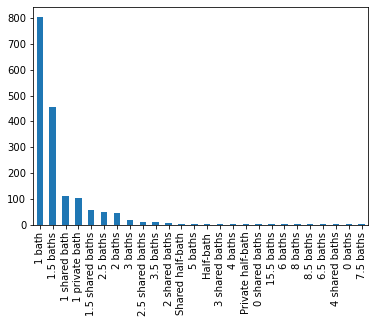

In [68]:
df['bathrooms_text'].value_counts().plot(kind='bar')

This variable can be seperated as 1 for number of bathrooms and other for if it is public or shared

In [69]:
df['bathrooms_text'].value_counts()

1 bath               803
1.5 baths            457
1 shared bath        112
1 private bath       103
1.5 shared baths      55
2.5 baths             50
2 baths               45
3 baths               17
2.5 shared baths      10
3.5 baths             10
2 shared baths         7
Shared half-bath       4
5 baths                4
Half-bath              4
3 shared baths         3
4 baths                3
Private half-bath      2
0 shared baths         2
15.5 baths             1
6 baths                1
8 baths                1
8.5 baths              1
6.5 baths              1
4 shared baths         1
0 baths                1
7.5 baths              1
Name: bathrooms_text, dtype: int64

In [70]:
for i in df['bathrooms_text'].unique():
    print(i)

1 private bath
1.5 baths
2.5 baths
1 bath
2 shared baths
3 shared baths
Shared half-bath
1.5 shared baths
2 baths
1 shared bath
3.5 baths
3 baths
2.5 shared baths
8.5 baths
0 baths
5 baths
Half-bath
Private half-bath
4 shared baths
4 baths
0 shared baths
6.5 baths
15.5 baths
8 baths
6 baths
7.5 baths


Again, creating a dictionary so that i can make new columns that i think will be helpful

In [71]:
type_of_bath = {
'1 private bath': 'Private',
'2.5 baths': 'Private',
'1 bath': 'Private',
'2 shared baths': 'Public',
'1.5 baths': 'Private',
'Shared half-bath': 'Public',
'1.5 shared baths': 'Public',
'2 baths': 'Private',
'3 shared baths': 'Public',
'3 baths': 'Private',
'1 shared bath': 'Public',
'2.5 shared baths': 'Public',
'3.5 baths': 'Private',
'8.5 baths': 'Private',
'0 baths': 'Private',
'Half-bath': 'Private',
'Private half-bath': 'Private',
'5 baths': 'Private',
'4 shared baths': 'Public',
'0 shared baths': 'Public',
'4 baths': 'Private',
'6.5 baths': 'Private',
'15.5 baths': 'Private',
'8 baths': 'Private',
'6 baths': 'Private',
'7.5 baths': 'Private'
}

In [72]:
no_of_bath = {
'1 private bath': 1,
'2.5 baths': 2.5,
'1 bath': 1,
'2 shared baths': 2,
'1.5 baths': 1.5,
'Shared half-bath': 0.5,
'1.5 shared baths': 1.5,
'2 baths': 2,
'3 shared baths': 3,
'3 baths': 3,
'1 shared bath': 1,
'2.5 shared baths': 2.5,
'3.5 baths': 3.5,
'8.5 baths': 8.5,
'0 baths': 0,
'Half-bath': 0.5,
'Private half-bath': 0.5,
'5 baths': 5,
'4 shared baths': 4,
'0 shared baths': 0,
'4 baths': 4,
'6.5 baths': 6.5,
'15.5 baths': 15.5,
'8 baths': 8,
'6 baths': 6,
'7.5 baths': 7.5
}

In [73]:
df['no_of_bath'] = df['bathrooms_text'].map(no_of_bath)

In [74]:
df['type_of_bath'] = df['bathrooms_text'].map(type_of_bath)

In [75]:
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,host_since,host_location,total_reviews,days_since_review,comment_length,days_since_joined,host_location_country,property_type_kind,no_of_bath,type_of_bath
0,50904.0,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,...,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1358.500000,255.500000,4234,Belgium,Private,1.0,Private
1,891884.0,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,...,2010-09-14,"Antwerp, Flanders, Belgium",2.0,619.000000,127.000000,4234,Belgium,Private,1.0,Private
2,891907.0,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,...,2010-09-14,"Antwerp, Flanders, Belgium",6.0,1694.500000,300.166667,4234,Belgium,Entire,1.5,Private
3,2543695.0,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,...,2010-09-14,"Antwerp, Flanders, Belgium",15.0,1603.866667,362.866667,4234,Belgium,Entire,1.5,Private
4,116134.0,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,...,2011-05-14,"Kapellen, Flanders, Belgium",120.0,1540.908333,265.266667,3992,Belgium,Entire,2.5,Private


-----------------

In [76]:
df['amenities']

0       ["Kitchen", "Smoke alarm", "Hair dryer", "Keyp...
1       ["Refrigerator", "Kitchen", "Smoke alarm", "Ha...
2       ["Refrigerator", "Kitchen", "Smoke alarm", "Ha...
3       ["Refrigerator", "Kitchen", "Smoke alarm", "Ha...
4       ["Refrigerator", "Elevator", "Paid street park...
                              ...                        
1694    ["Refrigerator", "Kitchen", "Smoke alarm", "Sh...
1695    ["Long term stays allowed", "Kitchen", "Smoke ...
1696    ["Refrigerator", "Elevator", "Yamaha RX-A550 s...
1697    ["Refrigerator", "Private garden or backyard",...
1698    ["Kitchen", "Voice command Google  Bluetooth s...
Name: amenities, Length: 1699, dtype: object

Maybe we can create a variable that checks for the number of amenities, and if that does not perform too well, then maybe we can encode for the amenities individually.

In [77]:
import ast
x = ast.literal_eval(df['amenities'][0])
x

['Kitchen',
 'Smoke alarm',
 'Hair dryer',
 'Keypad',
 'Carbon monoxide alarm',
 'Mini fridge',
 'Wifi',
 'Dishes and silverware',
 'Security cameras on property',
 'Clothing storage',
 'Luggage dropoff allowed',
 'Bed linens',
 'Iron',
 'Dedicated workspace',
 'Microwave',
 'Molton Brown body soap',
 'Essentials',
 'Hot water kettle',
 'Long term stays allowed',
 'Portable fans',
 'Wine glasses',
 'Heating',
 'Paid parking off premises',
 'Hot water',
 'Fire extinguisher',
 'Bluetooth sound system',
 'Coffee maker',
 'Molton Brown shampoo',
 'Safe',
 'Hangers',
 'Cable TV',
 'TV with standard cable',
 'Shower gel']

In [78]:
def check_number_amneties(x):
    list_of_amnities = ast.literal_eval(x)
    no_of_amnities = len(list_of_amnities)
    return no_of_amnities

In [79]:
df['amenities'].apply(check_number_amneties)

0       33
1       31
2       46
3       44
4       45
        ..
1694    30
1695     8
1696    37
1697    29
1698    35
Name: amenities, Length: 1699, dtype: int64

In [80]:
df['number_of_amneties'] = df['amenities'].apply(check_number_amneties)

In [81]:
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,host_location,total_reviews,days_since_review,comment_length,days_since_joined,host_location_country,property_type_kind,no_of_bath,type_of_bath,number_of_amneties
0,50904.0,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,...,"Antwerp, Flanders, Belgium",2.0,1358.500000,255.500000,4234,Belgium,Private,1.0,Private,33
1,891884.0,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,...,"Antwerp, Flanders, Belgium",2.0,619.000000,127.000000,4234,Belgium,Private,1.0,Private,31
2,891907.0,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,...,"Antwerp, Flanders, Belgium",6.0,1694.500000,300.166667,4234,Belgium,Entire,1.5,Private,46
3,2543695.0,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,...,"Antwerp, Flanders, Belgium",15.0,1603.866667,362.866667,4234,Belgium,Entire,1.5,Private,44
4,116134.0,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,...,"Kapellen, Flanders, Belgium",120.0,1540.908333,265.266667,3992,Belgium,Entire,2.5,Private,45
